# Organización de variables por cuartiles
    

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo CSV
archivo_csv = 'tabla_completa.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(archivo_csv)

# Filtrar las columnas de interés
columnas_interes = [
    'Big', 'Medium', 'Small', 'Total_Pharmacies', 
    'Pharmacy_Density_per_100k', 'Income_per_Big_Pharmacy'
]
df_filtrado = df[columnas_interes]

# Calcular los cuartiles
cuartiles = df_filtrado.quantile([0.25, 0.5, 0.75])

# Mostrar la tabla de cuartiles
print("Cuartiles:")
print(cuartiles)

Cuartiles:
      Big  Medium  Small  Total_Pharmacies  Pharmacy_Density_per_100k  \
0.25  1.0     0.0    0.0               2.0                  24.232516   
0.50  3.0     2.0    2.0               6.0                  43.487126   
0.75  8.0     6.0    7.0              17.0                  67.734733   

      Income_per_Big_Pharmacy  
0.25                 0.000000  
0.50              1490.080763  
0.75              2942.651607  


1. Big (Farmacias grandes):
Q1 (0.25 cuartil = 1.0): El 25% de los municipios tienen 1 o menos farmacias grandes.
Q2 (0.50 cuartil = 3.0): El 50% de los municipios tienen 3 o menos farmacias grandes. Esto significa que la mediana (valor central) es 3.
Q3 (0.75 cuartil = 8.0): El 75% de los municipios tienen 8 o menos farmacias grandes.
Interpretación: La mayoría de los municipios tienen pocas farmacias grandes, y solo el 25% superior tiene más de 8 farmacias grandes. Esto sugiere una concentración de farmacias grandes en unos pocos municipios, mientras que la mayoría tienen un número más bajo.

2. Medium (Farmacias medianas):
Q1 (0.25 cuartil = 0.0): El 25% de los municipios no tienen ninguna farmacia mediana.
Q2 (0.50 cuartil = 2.0): El 50% de los municipios tienen 2 o menos farmacias medianas.
Q3 (0.75 cuartil = 6.0): El 75% de los municipios tienen 6 o menos farmacias medianas.
Interpretación: Similar a las farmacias grandes, existe una tendencia a tener pocas farmacias medianas. Un cuarto de los municipios ni siquiera tiene farmacias medianas, y la mediana es de 2 farmacias.

3. Small (Farmacias pequeñas):
Q1 (0.25 cuartil = 0.0): El 25% de los municipios no tienen ninguna farmacia pequeña.
Q2 (0.50 cuartil = 2.0): El 50% de los municipios tienen 2 o menos farmacias pequeñas.
Q3 (0.75 cuartil = 7.0): El 75% de los municipios tienen 7 o menos farmacias pequeñas.
Interpretación: Las farmacias pequeñas están más presentes que las medianas, pero aún así un cuarto de los municipios no tienen ninguna farmacia pequeña. La distribución es similar a la de las farmacias medianas, pero ligeramente más amplia.

4. Total_Pharmacies (Total de farmacias):
Q1 (0.25 cuartil = 2.0): El 25% de los municipios tienen 2 o menos farmacias en total (sumando grandes, medianas y pequeñas).
Q2 (0.50 cuartil = 6.0): El 50% de los municipios tienen 6 o menos farmacias en total.
Q3 (0.75 cuartil = 17.0): El 75% de los municipios tienen 17 o menos farmacias en total.
Interpretación: La cantidad total de farmacias está concentrada en niveles bajos, ya que la mediana muestra que la mitad de los municipios tienen 6 o menos farmacias. Solo el 25% superior tiene más de 17 farmacias en total.

5. Pharmacy_Density_per_100k (Densidad de farmacias por cada 100,000 habitantes):
Q1 (0.25 cuartil = 24.23 farmacias): El 25% de los municipios tienen una densidad de 24.23 farmacias o menos por cada 100,000 habitantes.
Q2 (0.50 cuartil = 43.49 farmacias): El 50% de los municipios tienen una densidad de 43.49 farmacias o menos por cada 100,000 habitantes.
Q3 (0.75 cuartil = 67.73 farmacias): El 75% de los municipios tienen una densidad de 67.73 farmacias o menos por cada 100,000 habitantes.
Interpretación: La densidad de farmacias por cada 100,000 habitantes varía significativamente. El 25% inferior tiene menos de 24 farmacias por cada 100,000 habitantes, mientras que el 75% superior tiene hasta 67 farmacias. Esto indica que hay zonas con baja densidad de farmacias.

6. Income_per_Big_Pharmacy (Ingreso por farmacia grande):
Q1 (0.25 cuartil = 0.0): El 25% de los municipios no tienen ingresos reportados por farmacias grandes (probablemente porque no tienen farmacias grandes).
Q2 (0.50 cuartil = 1490.08): El ingreso por farmacia grande en el 50% de los municipios es de 1,490 pesos o menos.
Q3 (0.75 cuartil = 2942.65): El ingreso por farmacia grande en el 75% de los municipios es de 2,942 pesos o menos.
Interpretación: El ingreso por farmacia grande varía bastante, y un 25% de los municipios no tienen ingresos reportados en esta categoría, lo que sugiere que no tienen farmacias grandes. Los municipios con farmacias grandes generan entre 1,490 y 2,942 pesos, lo que indica ingresos moderados en este sector.

Concentración baja de farmacias: La mayoría de los municipios tienen pocas farmacias en total, ya que los cuartiles superiores solo llegan a 17 farmacias totales.
Distribución desigual: Existe una desigualdad significativa en la densidad de farmacias y en los ingresos por farmacia grande, con algunos municipios que no tienen farmacias grandes o medianas, mientras que otros tienen un número considerable.
Oportunidades de expansión: Los municipios que caen en el cuartil inferior (Q1) podrían representar áreas con baja cobertura de farmacias, lo que podría ser una oportunidad de expansión.

In [18]:
df_filtrado = df.copy()
cuartiles = df[columnas_interes].quantile([0.25, 0.5, 0.75])

# Función para asignar cuartil a cada valor
def asignar_cuartil(valor, q1, q2, q3):
    if pd.isna(valor):
        return None
    if valor <= q1:
        return 1
    elif valor <= q2:
        return 2
    elif valor <= q3:
        return 3
    else:
        return 4

for col in columnas_interes:
    q1, q2, q3 = cuartiles[col]
    df_filtrado[f'{col}_Quartile'] = df[col].apply(asignar_cuartil, args=(q1, q2, q3))

tabla_cuartiles = 'tabla_con_cuartiles.csv'
df_filtrado.to_csv(tabla_cuartiles, index=False)

print(f'Archivo guardado: {tabla_cuartiles}')

Archivo guardado: tabla_con_cuartiles.csv


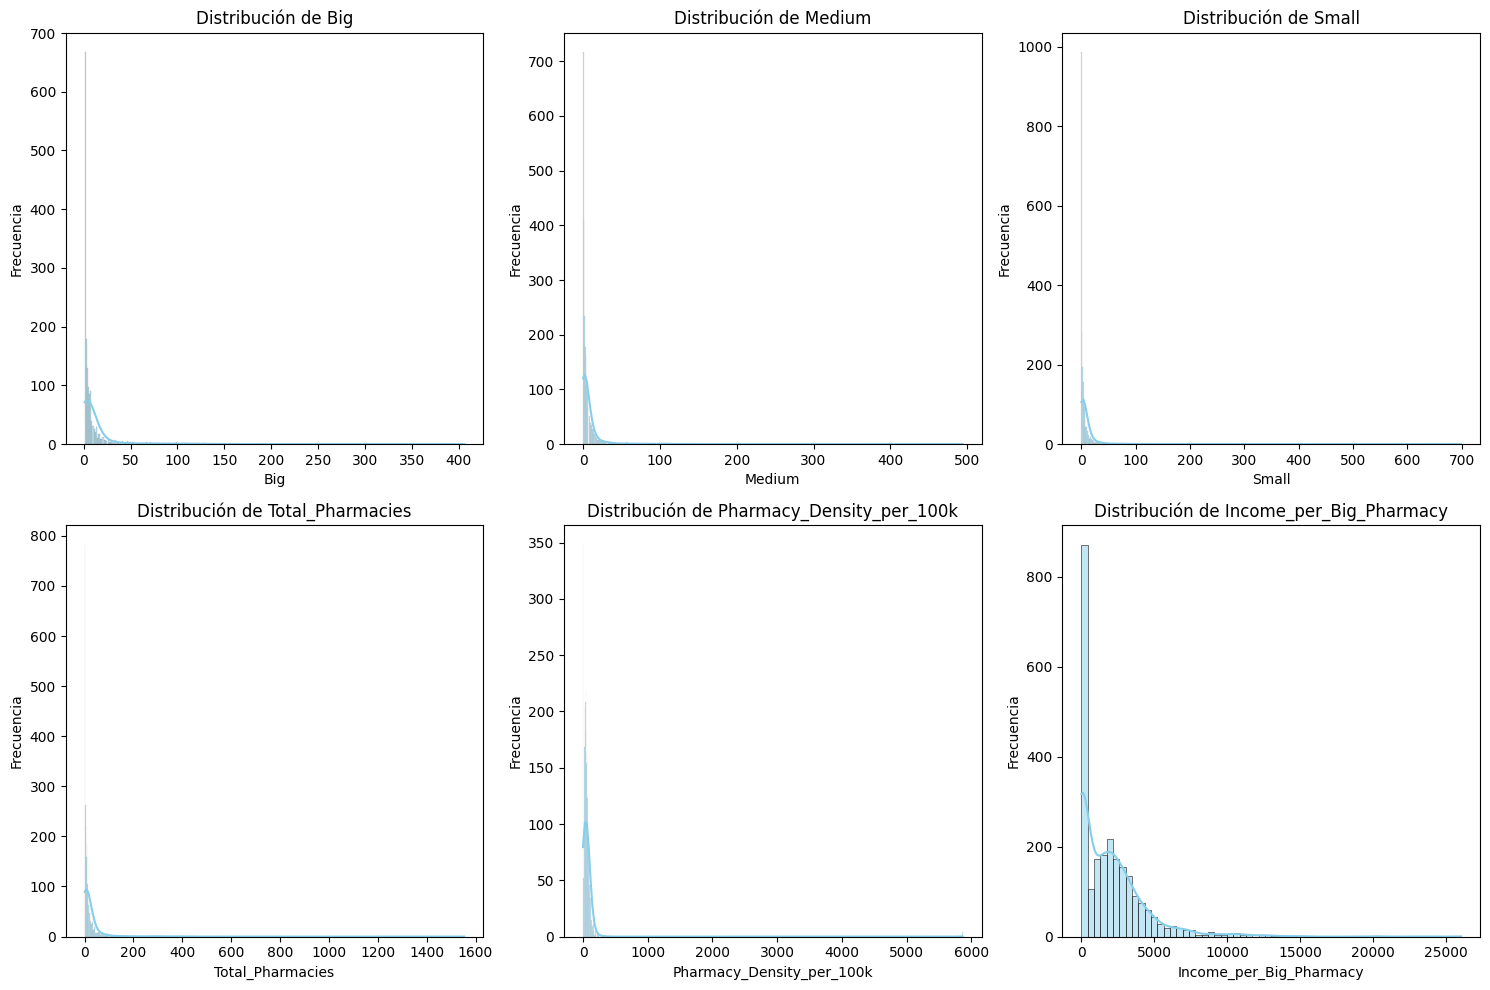

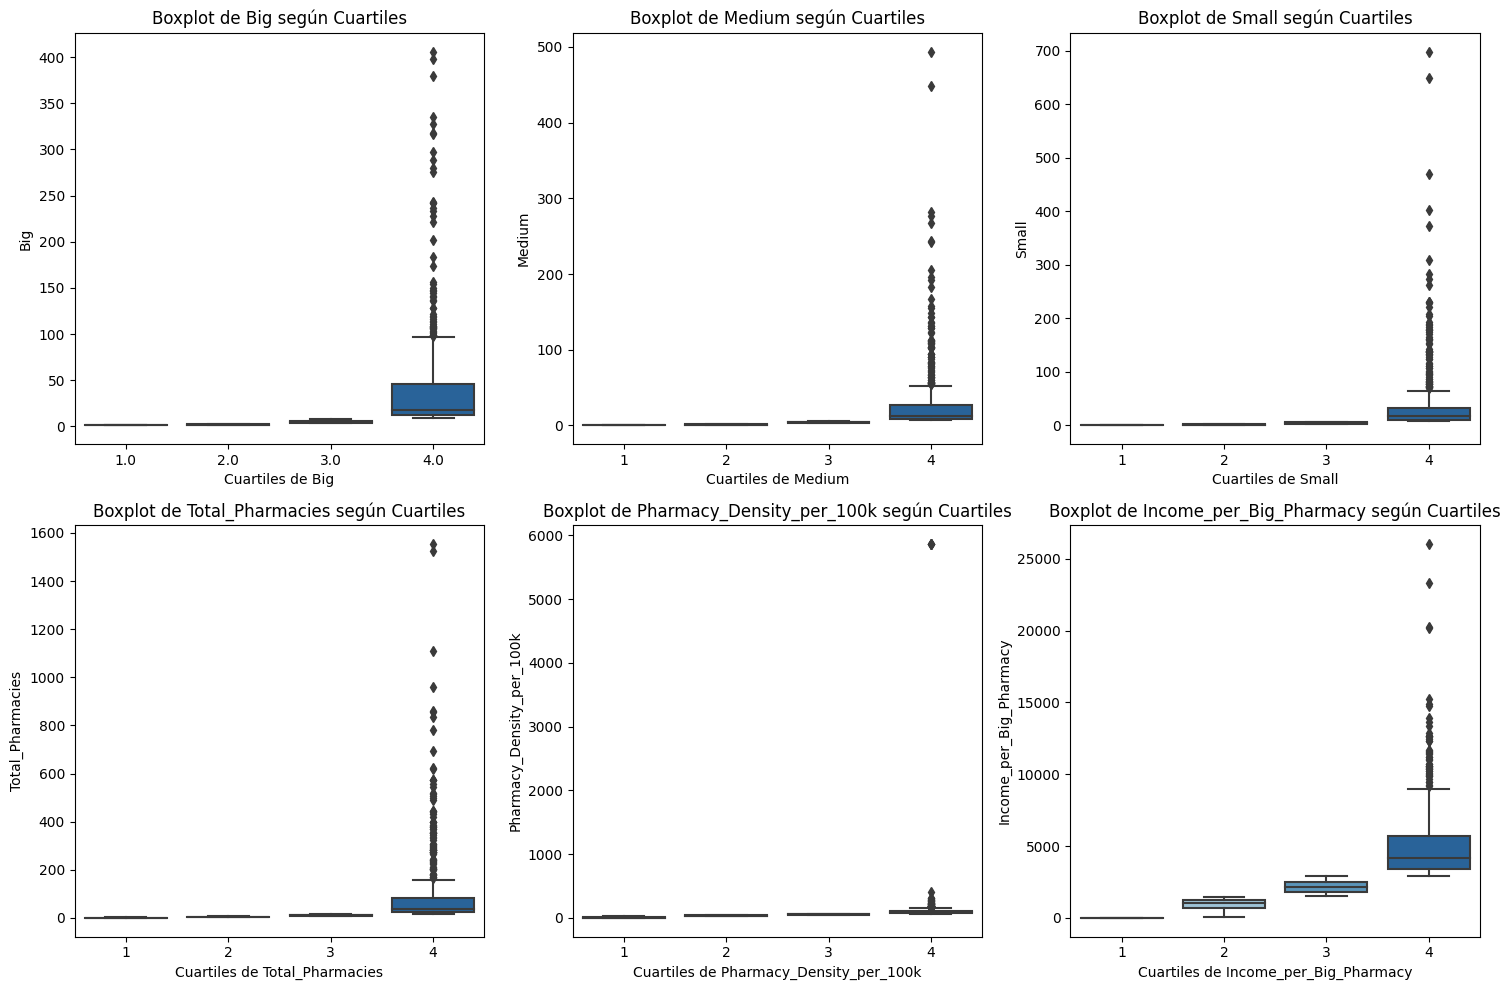

In [24]:
import seaborn as sns

# Filtrar las columnas de interés (sin los cuartiles)
columnas_interes = [
    'Big', 'Medium', 'Small', 'Total_Pharmacies', 
    'Pharmacy_Density_per_100k', 'Income_per_Big_Pharmacy'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_interes):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_filtrado[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_interes):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_filtrado[f'{col}_Quartile'], y=df_filtrado[col], palette='Blues')
    plt.title(f'Boxplot de {col} según Cuartiles')
    plt.xlabel(f'Cuartiles de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()